# Keras CNN MNIST

#### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



### Dealing with colors images

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test)= cifar10.load_data() 

- 50000 images
- 32 by 32
- 3 : colors

Look at single image

In [ ]:
X_train[0].shape

(32, 32, 3)

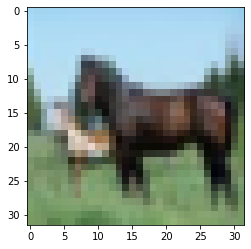

In [ ]:
plt.imshow(X_train[12])

Preprocessing

In [ ]:
X_train[0].max()

255

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

One hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
y_train[0]

array([6], dtype=uint8)

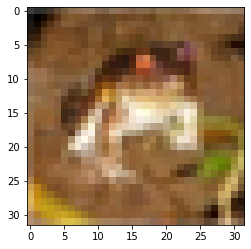

In [ ]:
plt.imshow(X_train[0])

## Creating and training the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [ ]:
28*28# in B& W


784

In [ ]:
32*32*3 #in COlor so we have to add much more CONV and Pooling layer

3072

In [ ]:
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(32,32,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(32,32,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))



model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 62s 39ms/step - loss: 1.7245 - accuracy: 0.3689 - val_loss: 1.3018 - val_accuracy: 0.5279
Epoch 2/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2151 - accuracy: 0.5699 - val_loss: 1.1154 - val_accuracy: 0.6106
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0237 - accuracy: 0.6415 - val_loss: 1.0588 - val_accuracy: 0.6348
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9183 - accuracy: 0.6811 - val_loss: 0.9961 - val_accuracy: 0.6580
Epoch 5/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8266 - accuracy: 0.7104 - val_loss: 0.9980 - val_accuracy: 0.6579
Epoch 6/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7502 - accuracy: 0.7407 - val_loss: 0.9943 - val_accuracy: 0.6680
Epoch 7/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6765 - accuracy: 0.7657 - val_loss: 1.0097 -

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.508581,0.45266,1.301805,0.5279
1,1.170962,0.58776,1.115377,0.6106
2,1.022382,0.64090,1.058850,0.6348
3,0.918880,0.67966,0.996141,0.6580
4,0.833422,0.70980,0.997970,0.6579
5,0.760481,0.73758,0.994303,0.6680
6,0.692975,0.75892,1.009731,0.6634
7,0.631213,0.78156,1.012073,0.6711


In [ ]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

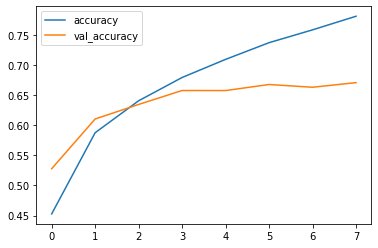

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
metrics[['loss','val_loss']]

,loss,val_loss
0,1.508581,1.301805
1,1.170962,1.115377
2,1.022382,1.058850
3,0.918880,0.996141
4,0.833422,0.997970
5,0.760481,0.994303
6,0.692975,1.009731
7,0.631213,1.012073


In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[1.0120733976364136, 0.6711000204086304]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.80      0.76      0.78      1000
           2       0.62      0.54      0.58      1000
           3       0.46      0.52      0.49      1000
           4       0.60      0.64      0.62      1000
           5       0.53      0.57      0.55      1000
           6       0.83      0.68      0.75      1000
           7       0.73      0.74      0.74      1000
           8       0.74      0.80      0.77      1000
           9       0.76      0.72      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
#it look like he has trouble with cat : class 3 
#it perform great on class 1 : automobile

In [ ]:
confusion_matrix(y_test,predictions)

array([[736,  22,  46,  27,  12,  21,   5,   9,  97,  25],
       [ 30, 758,  14,  16,   9,   5,   9,   5,  53, 101],
       [ 68,   9, 544,  72, 106,  98,  42,  32,  19,  10],
       [ 27,  11,  49, 522,  85, 189,  33,  47,  18,  19],
       [ 32,   5,  74,  65, 635,  57,  28,  83,  14,   7],
       [ 11,   5,  51, 232,  44, 568,  14,  56,   6,  13],
       [ 12,   8,  48, 100,  75,  45, 680,  15,   7,  10],
       [ 18,   5,  22,  54,  68,  64,   1, 741,   8,  19],
       [ 81,  34,  14,  20,  14,  13,   2,   1, 802,  19],
       [ 39,  88,  16,  21,   9,  18,   3,  21,  60, 725]])

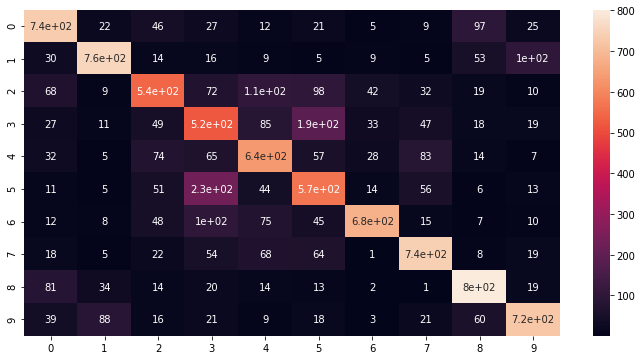

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

### Predict a single image

In [ ]:
my_image = X_test[16]

In [ ]:
my_image.shape

(32, 32, 3)

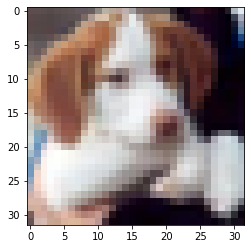

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[16]

array([5], dtype=uint8)

In [ ]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])